# Stock Market Analysis Notebook

This notebook aims to analyzing stock data related to a few car companies, from Jan 1 2016 to today. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


## 1 Getting the Data via pandas_datareader

### Tesla Stock (Ticker: TSLA on the NASDAQ)

Use pandas_datareader to obtain the historical stock information for Tesla from Jan 1, 2012 to Jan 1, 2017.

Pandas提供了专门从财经网站获取金融数据的API接口，可作为量化交易股票数据获取的另一种途径，该接口在urllib3库基础上实现了以客户端身份访问网站的股票数据。需要注意的是目前模块已经迁徙到pandas-datareader包中，因此导入模块时需要由import pandas.io.data as web更改为import pandas_datareader.data as web。

In [2]:
import pandas_datareader
import datetime
import pandas_datareader.data as web

In [3]:
start = datetime.datetime(2016, 1, 1)
end = datetime.date.today()
tesla = web.DataReader("TSLA", 'yahoo', start, end)

In [4]:
tesla.head()  # Date is the index， volume是成交量

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,46.276001,43.799999,46.144001,44.681999,34135500.0,44.681999
2016-01-05,45.377998,44.000000,45.271999,44.686001,15934000.0,44.686001
2016-01-06,44.009998,43.195999,44.000000,43.807999,18895500.0,43.807999
2016-01-07,43.688000,42.734001,42.838001,43.130001,17771500.0,43.130001
2016-01-08,44.088001,42.153999,43.571999,42.200001,18140500.0,42.200001


### Other Car Companies

Ford and GM (General Motors)

In [5]:
ford = web.DataReader("F", 'yahoo', start, end)
gm = web.DataReader("GM",'yahoo',start,end)

In [6]:
ford.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-11,9.32,8.82,8.87,9.30,96129500.0,9.30
2021-01-12,9.82,9.29,9.30,9.78,124808500.0,9.78
2021-01-13,9.92,9.64,9.91,9.78,89549300.0,9.78
2021-01-14,10.20,9.79,9.81,10.17,112695300.0,10.17
2021-01-15,10.04,9.82,10.04,9.83,96181486.0,9.83


In [7]:
gm.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-11,45.279999,42.630001,43.020000,45.009998,25887300.0,45.009998
2021-01-12,48.950001,45.650002,46.299999,47.820000,63889300.0,47.820000
2021-01-13,50.970001,48.060001,50.779999,48.730000,49229700.0,48.730000
2021-01-14,51.869999,49.330002,49.500000,51.529999,36839800.0,51.529999
2021-01-15,51.360001,49.255001,51.299999,49.970001,23980124.0,49.970001


## 2 Visualizing the Data

### Open Price

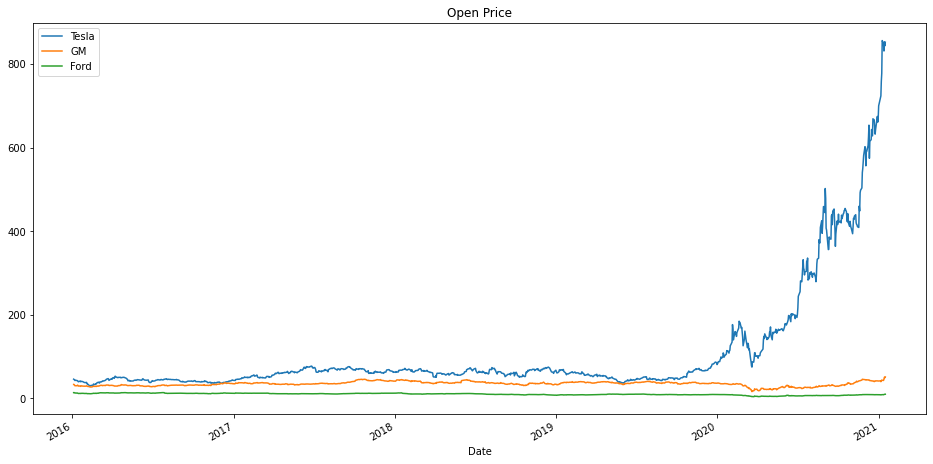

In [8]:
tesla['Open'].plot(label='Tesla',figsize=(16,8),title='Open Price')  # 这河里吗？
gm['Open'].plot(label='GM')
ford['Open'].plot(label='Ford')
plt.legend()

### Volume



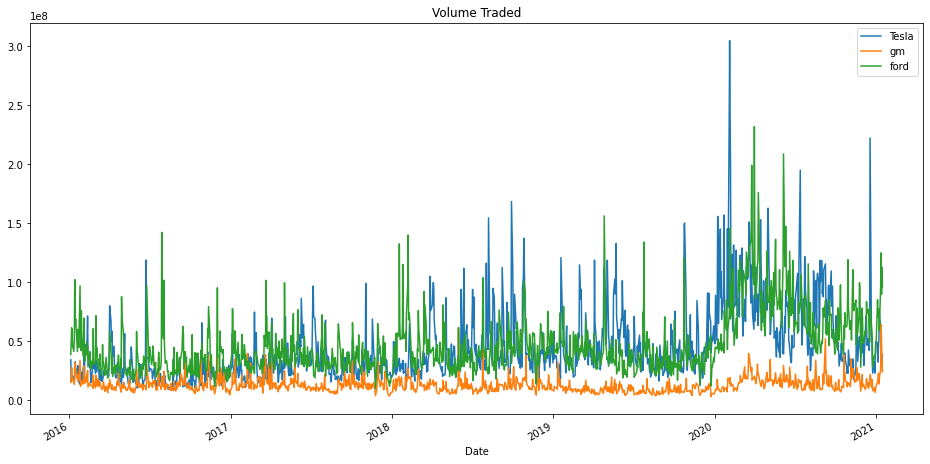

In [9]:
tesla['Volume'].plot(label='Tesla',figsize=(16,8),title='Volume Traded')
gm['Volume'].plot(label='gm')
ford['Volume'].plot(label='ford')
plt.legend()

looks like Tesla had a really big spike somewhere in early 2020. What was the date of this maximum trading volume for Ford?

In [10]:
tesla['Volume'].argmax()  # argmax返回的是最大数的索引，但貌似是行数并没有返回本来的索引Date啊什么鬼

1028

In [11]:
tesla['Volume'][1028]   # 1028 row的那个volumn是最大值

304694000.0

In [12]:
tesla.loc[(tesla['Volume'] == tesla['Volume'][1028])]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-02-04,193.798004,166.776001,176.591995,177.412003,304694000.0,177.412003


In [13]:
# So what happened on 2020-02-04?
# https://finance.yahoo.com/news/premarket-prep-recap-feb-4-160026562.html?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAAGC_jnzKDJ4dnPh-7kTYtzKOpR2M0xiUyWULkEv4d6qz35ckFrispwS94_BHWoxCzzHfrHTwTUZyz9OYlA1Xjd3h87pBejRjHMc28vXSAgrDXPGcaCbm-gUK4ELFOLwAMBNCDTd8nB7MSSXV_FgrJ1exm_FOqn8XGZKUEbKcn7ls

### Total Traded

** The Open Price Time Series Visualization makes Tesla look like its always been much more valuable as a company than GM and Ford. But to really understand this we would need to look at the total market cap of the company, not just the stock price. Unfortunately our current data doesn't have that information of total units of stock present. But what we can do as a simple calcualtion to try to represent total money traded would be to multply the Volume column by the Open price. Remember that this still isn't the actual Market Cap, its just a visual representation of the total amount of money being traded around using the time series. (e.g. 100 units of stock at \$10 each versus 100000 units of stock at $1 each)**

In [14]:
# "Total Traded" is the Open Price multiplied by the Volume Traded
tesla['Total Traded'] = tesla['Open']*tesla['Volume']
ford['Total Traded'] = ford['Open']*ford['Volume']
gm['Total Traded'] = gm['Open']*gm['Volume']

Plot "Total Traded" against the time index.


Text(0, 0.5, 'Total Traded')

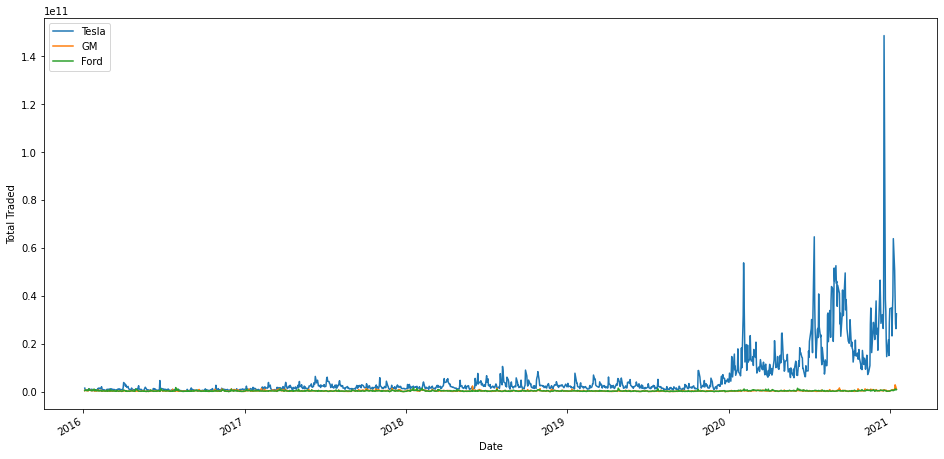

In [15]:
tesla['Total Traded'].plot(label='Tesla',figsize=(16,8))
gm['Total Traded'].plot(label='GM')
ford['Total Traded'].plot(label='Ford')
plt.legend()
plt.ylabel('Total Traded')

looks like there was huge amount of money traded for Tesla somewhere in late 2021. What date was that and what happened?

In [16]:
tesla['Total Traded'].argmax()

1250

In [17]:
tesla.loc[(tesla['Total Traded'] == tesla['Total Traded'][1250])]

,High,Low,Open,Close,Volume,Adj Close,Total Traded
Date,,,,,,,
2020-12-18,695.0,628.539978,668.900024,695.0,222126200.0,695.0,1.485802e+11


### Moving Averages

MA移动平均价格. MA50就是这支股票在最近50天内价格的平均数值移动曲线。

Plot out the MA50 and MA200 for Tesla.

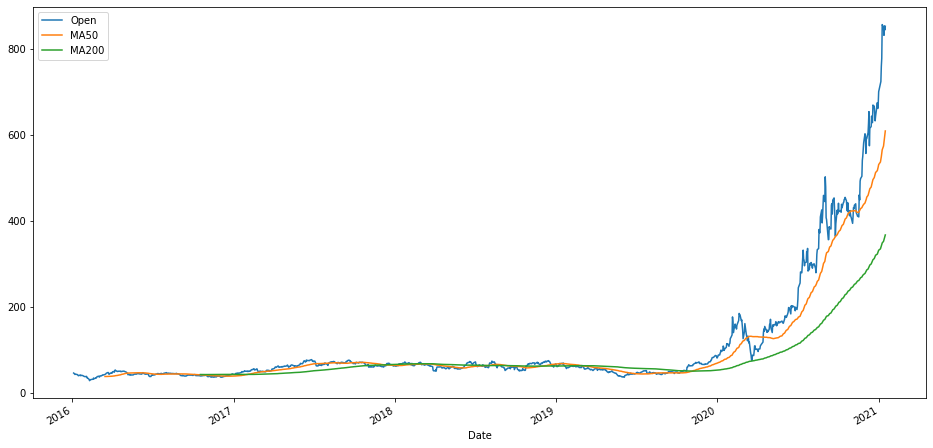

In [18]:
tesla['MA50'] = tesla['Open'].rolling(50).mean()
tesla['MA200'] = tesla['Open'].rolling(200).mean()
tesla[['Open','MA50','MA200']].plot(label='tesla',figsize=(16,8))

### Relationship between these stocks

They are all related to the car industry, so check out the relationship using scatter matrix plot.

In [19]:
from pandas.plotting import scatter_matrix

# 按列拼起来
all_df = pd.concat([tesla['Open'],gm['Open'],ford['Open']],axis=1)
all_df.columns = ['Tesla Open','GM Open','Ford Open']

all_df

,Tesla Open,GM Open,Ford Open
Date,,,
2016-01-04,46.144001,33.450001,13.87
2016-01-05,45.271999,33.330002,13.97
2016-01-06,44.000000,31.950001,13.56
2016-01-07,42.838001,30.260000,12.90
2016-01-08,43.571999,30.459999,13.05
...,...,...,...
2021-01-11,849.400024,43.020000,8.87
2021-01-12,831.000000,46.299999,9.30
2021-01-13,852.760010,50.779999,9.91


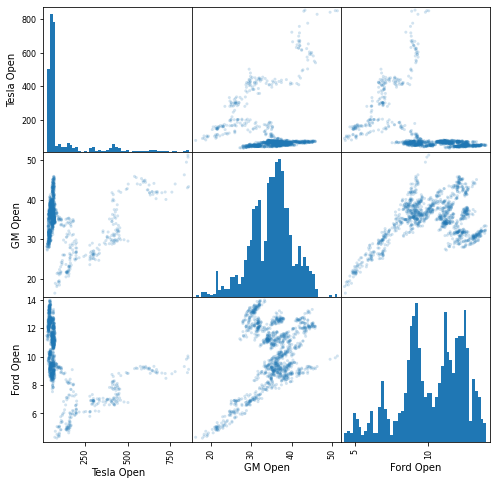

In [20]:
# You can use a semi-colon to remove the axes print outs
scatter_matrix(all_df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

 ### Candlestick chart

https://matplotlib.org/examples/pylab_examples/finance_demo.html

Create a CandleStick chart for Tesla in January 2021

In [21]:
# from matplotlib.finance import candlestick_ohlc
#从matplotlib 2.2.0版本开始，matplotlib.finance已经从matplotlib中剥离了，需要单独安装mpl_finance这个包
!pip install mpl_finance

In [22]:
from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY

In [23]:
# Rest the index to get a column of January Dates
tesla_reset = tesla.loc['2021-01':'2021-01'].reset_index()
tesla_reset

,Date,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA200
0,2021-01-04,744.489990,717.190002,719.460022,729.770020,48638200.0,729.770020,3.499324e+10,536.610003,334.787071
1,2021-01-05,740.840027,719.200012,723.659973,735.109985,32245200.0,735.109985,2.333456e+10,542.244802,337.967171
2,2021-01-06,774.000000,749.099976,758.489990,755.979980,44700000.0,755.979980,3.390450e+10,548.977802,341.326021
3,2021-01-07,816.989990,775.200012,777.630005,816.039978,51498900.0,816.039978,4.004709e+10,556.297802,344.736871
4,2021-01-08,884.489990,838.390015,856.000000,880.020020,74661000.0,880.020020,6.390982e+10,564.942602,348.471621
5,2021-01-11,854.429993,803.619995,849.400024,811.190002,59554100.0,811.190002,5.058525e+10,573.601002,352.171231
6,2021-01-12,868.000000,827.340027,831.000000,849.440002,46270700.0,849.440002,3.845095e+10,582.021802,355.821231
7,2021-01-13,860.469971,832.000000,852.760010,854.409973,33312500.0,854.409973,2.840757e+10,590.939003,359.574771
8,2021-01-14,863.000000,838.750000,843.390015,845.000000,31266300.0,845.000000,2.636969e+10,599.926803,363.290471
9,2021-01-15,859.900024,819.099976,852.000000,826.159973,38199595.0,826.159973,3.254605e+10,608.772203,367.046471


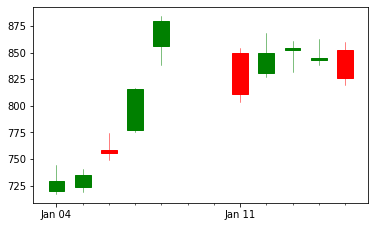

In [24]:
# Create a new column of numerical "date" values for matplotlib to use
tesla_reset['date_ax'] = tesla_reset['Date'].apply(lambda date: date2num(date))
tesla_values = [tuple(vals) for vals in tesla_reset[['date_ax', 'Open', 'High', 'Low', 'Close']].values]

mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
alldays = DayLocator()              # minor ticks on the days
weekFormatter = DateFormatter('%b %d')  # e.g., Jan 15
dayFormatter = DateFormatter('%d')      # e.g., 15

#Plot it
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)

candlestick_ohlc(ax, tesla_values, width=0.6, colorup='g',colordown='r');

这个图在Tableau里按瀑布图画的话，画起来更容易一些


# 3 Basic Financial Analysis

## Daily Percentage Change


$ r_t = \frac{p_t}{p_{t-1}} -1$

This defines r_t (return at time t) as equal to the price at time t divided by the price at time t-1 (the previous day) minus 1. Basically this just informs you of your percent gain (or loss) if you bought the stock on day and then sold it the next day. While this isn't necessarily helpful for attempting to predict future values of the stock, its very helpful in analyzing the volatility of the stock. If daily returns have a wide distribution, the stock is more volatile from one day to the next. 

In [25]:
# 直接用公式算
tesla['returns'] = (tesla['Close'] / tesla['Close'].shift(1) ) - 1
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA200,returns
Date,,,,,,,,,,
2016-01-04,46.276001,43.799999,46.144001,44.681999,34135500.0,44.681999,1.575149e+09,NaN,NaN,NaN
2016-01-05,45.377998,44.000000,45.271999,44.686001,15934000.0,44.686001,7.213640e+08,NaN,NaN,0.000090
2016-01-06,44.009998,43.195999,44.000000,43.807999,18895500.0,43.807999,8.314020e+08,NaN,NaN,-0.019648
2016-01-07,43.688000,42.734001,42.838001,43.130001,17771500.0,43.130001,7.612955e+08,NaN,NaN,-0.015477
2016-01-08,44.088001,42.153999,43.571999,42.200001,18140500.0,42.200001,7.904178e+08,NaN,NaN,-0.021563


In [26]:
# 或者用百分比变换率算
ford['returns'] = ford['Close'].pct_change(1)
ford.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns
Date,,,,,,,,
2016-01-04,14.00,13.75,13.87,13.97,38618500.0,10.638138,5.356386e+08,NaN
2016-01-05,14.00,13.51,13.97,13.72,50267500.0,10.447763,7.022370e+08,-0.017895
2016-01-06,13.56,13.05,13.56,13.11,61285500.0,9.983250,8.310314e+08,-0.044461
2016-01-07,13.04,12.60,12.90,12.70,57846700.0,9.671035,7.462224e+08,-0.031274
2016-01-08,13.10,12.50,13.05,12.54,46199400.0,9.549194,6.029022e+08,-0.012598


In [27]:
gm['returns'] = gm['Close'].pct_change(1)
gm.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns
Date,,,,,,,,
2016-01-04,33.540001,32.84,33.450001,33.310001,14875500.0,27.775911,4.975855e+08,NaN
2016-01-05,33.410000,32.18,33.330002,32.430000,19777200.0,27.042109,6.591741e+08,-0.026419
2016-01-06,31.980000,31.01,31.950001,31.270000,27515200.0,26.074837,8.791107e+08,-0.035769
2016-01-07,30.820000,29.83,30.260000,29.990000,21046300.0,25.007492,6.368610e+08,-0.040934
2016-01-08,30.700001,29.42,30.459999,29.530001,16448000.0,24.623917,5.010061e+08,-0.015338


### Histogram of Returns (stack them on top of each other)

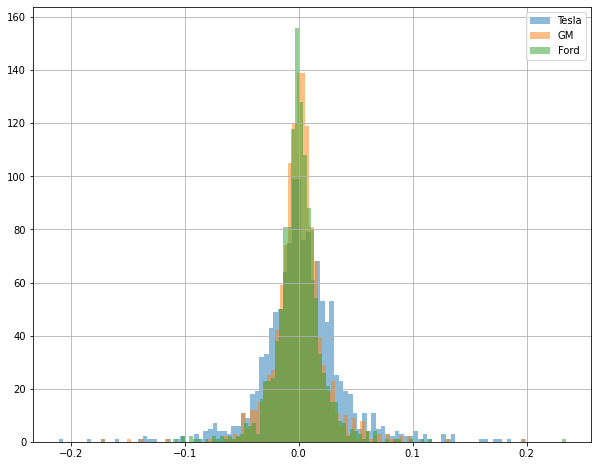

In [28]:
tesla['returns'].hist(bins=100,label='Tesla',figsize=(10,8),alpha=0.5)
gm['returns'].hist(bins=100,label='GM',alpha=0.5)
ford['returns'].hist(bins=100,label='Ford',alpha=0.5)
plt.legend()

### KDE Plot

核密度估计 Kernel Density Estimation

在直方图的基础上添加核密度图，必须将直方图的频数更改为频率。


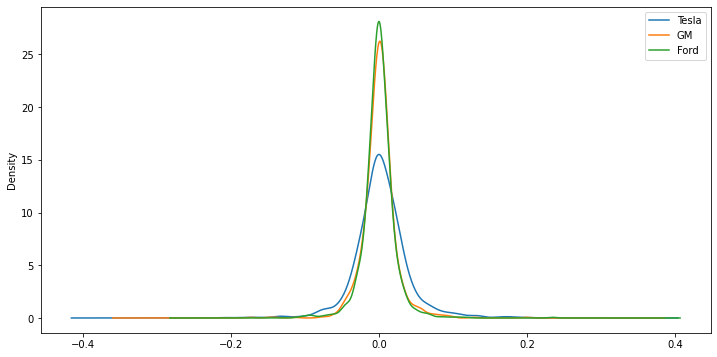

In [29]:
tesla['returns'].plot(kind='kde',label='Tesla',figsize=(12,6))
gm['returns'].plot(kind='kde',label='GM')
ford['returns'].plot(kind='kde',label='Ford')
plt.legend()


Ford has highest peak, so it's more stable than the other two.

TESLA has much wider distribution, so it's quite a bit more volatility不稳定.

### Box Plot

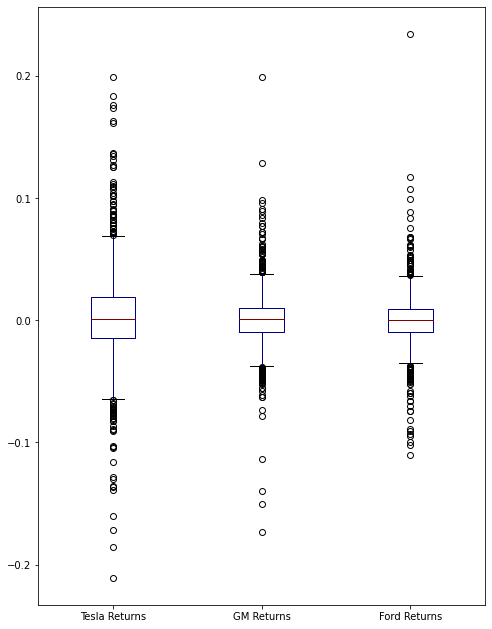

In [30]:
box_df = pd.concat([tesla['returns'],gm['returns'],ford['returns']],axis=1)
box_df.columns = ['Tesla Returns','GM Returns','Ford Returns']
box_df.plot(kind='box',figsize=(8,11),colormap='jet')

Tesla returns quite a bit more of a wide distribution a lot more outliers.

Ford and General Motors relatively similar and Ford's a little more stable.

## Comparing Daily Returns between Stocks

Plot a scatter matrix plot to see the correlation between each of the stocks daily returns. This helps answer the questions of How related the car companies are. Is Tesla begin treated more as a technology company rather than a car company by the market?


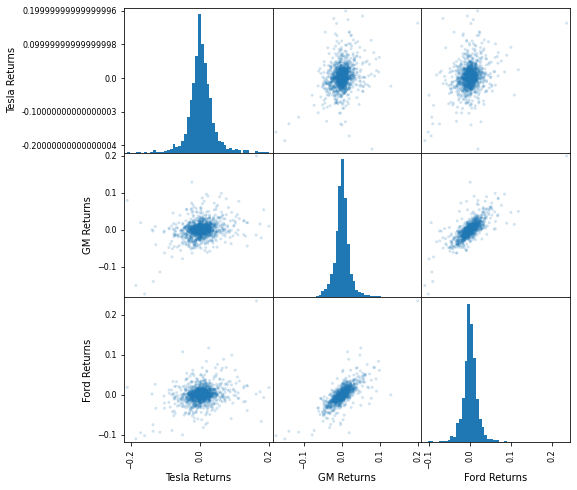

In [31]:
scatter_matrix(box_df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

Ford and General Motors tend to be correlated together, and Tesla not so much between the other two.

It looks like Ford and GM do have some sort of possible relationship, then plot scatter plot to look closer.

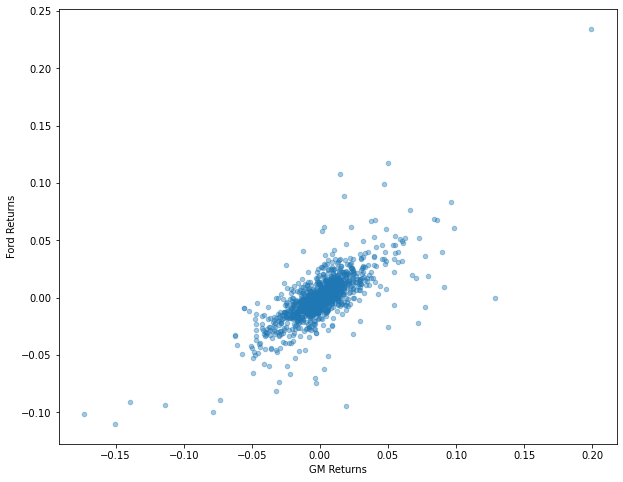

In [32]:
box_df.plot(kind='scatter',x='GM Returns',y='Ford Returns',alpha=0.4,figsize=(10,8))


## Cumulative Daily Returns


With daily cumulative returns, the question we are trying to answer is the following, if I invested $1 in the company at the beginning of the time series, how much would is be worth today? This is different than just the stock price at the current day, because **it will take into account the daily returns**. The simple calculation here won't take into account stocks that give back a dividend. 

A stock 'ABC' has the following prices corresponding to the dates given

    Date                        Price
    01/01/2018                   10
    01/02/2018                   15
    01/03/2018                   20
    01/04/2018                   25

**Daily Return** : Daily return is the profit/loss made by the stock compared to the previous day. (前面算过了).

    Date                         Daily Return                  %Daily Return
    01/01/2018                 10/10 =  1                          -   
    01/02/2018                 15/10 =  3/2                       50%
    01/03/2018                 20/15 =  4/3                       33%
    01/04/2018                 25/20 =  5/4                       20%

**Cumulative Return**: While daily returns are useful, it doesn't give the investor a immediate insight into the gains he had made till date, especially if the stock is very volatile. Cumulative return is computed relative to the day investment is made.  If cumulative return is above one, you are making profits else you are in loss. So for the above example cumulative gains are as follows

    Date                       Cumulative Return         %Cumulative Return
    01/01/2018                  10/10 =  1                         100 %   
    01/02/2018                  15/10 =  3/2                       150 %
    01/03/2018                  20/10 =  2                         200 %
    01/04/2018                  25/10 =  5/2                       250 %

The formula for a cumulative daily return is:

$ i_i = (1+r_t) * i_{t-1} $

Here we can see we are just multiplying our previous investment at i at t-1 by 1+our percent returns. 

    df[daily_cumulative_return] = ( 1 + df[pct_daily_return] ).cumprod()
    

In [33]:
tesla['Cumulative Return'] = (1 + tesla['returns']).cumprod()

In [34]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA200,returns,Cumulative Return
Date,,,,,,,,,,,
2016-01-04,46.276001,43.799999,46.144001,44.681999,34135500.0,44.681999,1.575149e+09,NaN,NaN,NaN,NaN
2016-01-05,45.377998,44.000000,45.271999,44.686001,15934000.0,44.686001,7.213640e+08,NaN,NaN,0.000090,1.000090
2016-01-06,44.009998,43.195999,44.000000,43.807999,18895500.0,43.807999,8.314020e+08,NaN,NaN,-0.019648,0.980440
2016-01-07,43.688000,42.734001,42.838001,43.130001,17771500.0,43.130001,7.612955e+08,NaN,NaN,-0.015477,0.965266
2016-01-08,44.088001,42.153999,43.571999,42.200001,18140500.0,42.200001,7.904178e+08,NaN,NaN,-0.021563,0.944452


In [35]:
ford['Cumulative Return'] = (1 + ford['returns']).cumprod()
gm['Cumulative Return'] = (1 + gm['returns']).cumprod()

plot the Cumulative Return columns against the time series index.

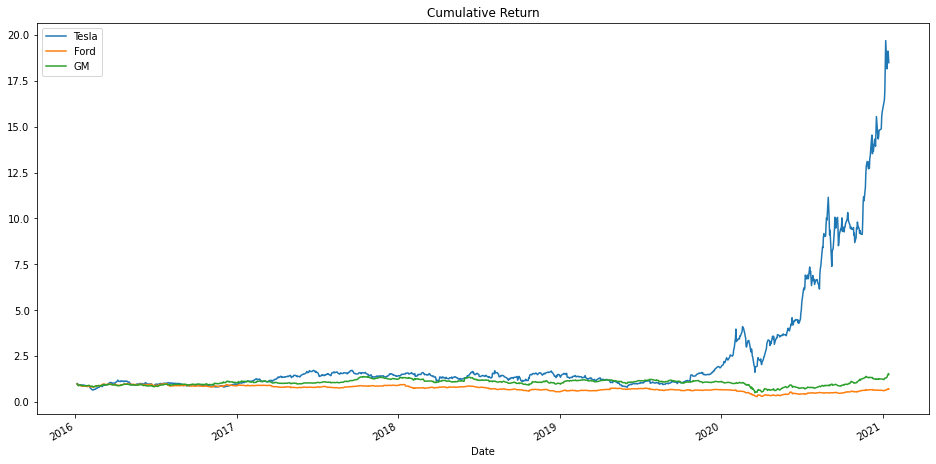

In [36]:
tesla['Cumulative Return'].plot(label='Tesla',figsize=(16,8),title='Cumulative Return')
ford['Cumulative Return'].plot(label='Ford')
gm['Cumulative Return'].plot(label='GM')
plt.legend()